In [89]:
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np

iris = load_iris(as_frame=True)
sns.set(style="white", color_codes=True)

### Load the iris dataset

In [90]:
X = iris.data
X.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Set the target variable, and the class labels into two types: virginica and non-virginica

In [91]:
y = (iris.target_names[iris.target] == "virginica").astype(int)

### Table with descriptive statistics for each of the two classes.

In [92]:
import pandas as pd

class1_index = len(y[y == 0])
EDA_table_attributes = ["class", "attribute", "statistics_type", "value"]

df_class1_EDA = pd.DataFrame(columns=EDA_table_attributes)
df_class2_EDA = pd.DataFrame(columns=EDA_table_attributes)

sta_types = ["mean", "std", "min", "25%", "50%", "75%", "max"]

for col in X.columns:
    c1_values = X[col][:class1_index].describe()
    c2_values = X[col][class1_index:].describe()

    for sta_type in sta_types:
        df_class1_EDA.loc[len(df_class1_EDA)] = [
            "class1",
            col,
            sta_type,
            c1_values[sta_type],
        ]
        df_class2_EDA.loc[len(df_class2_EDA)] = [
            "class2",
            col,
            sta_type,
            c2_values[sta_type],
        ]
print(df_class1_EDA.head(5), "\n")
print(df_class2_EDA.head(5))

    class      attribute statistics_type     value
0  class1  SepalLengthCm            mean  5.471000
1  class1  SepalLengthCm             std  0.641698
2  class1  SepalLengthCm             min  4.300000
3  class1  SepalLengthCm             25%  5.000000
4  class1  SepalLengthCm             50%  5.400000 

    class      attribute statistics_type    value
0  class2  SepalLengthCm            mean  6.58800
1  class2  SepalLengthCm             std  0.63588
2  class2  SepalLengthCm             min  4.90000
3  class2  SepalLengthCm             25%  6.22500
4  class2  SepalLengthCm             50%  6.50000


### 1 Histogram per feature, for each of the two classes.

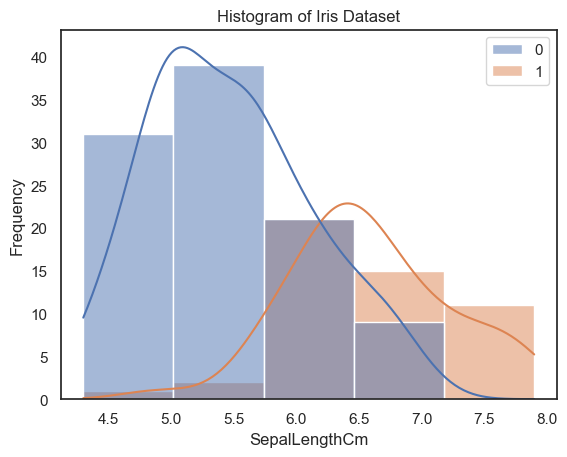

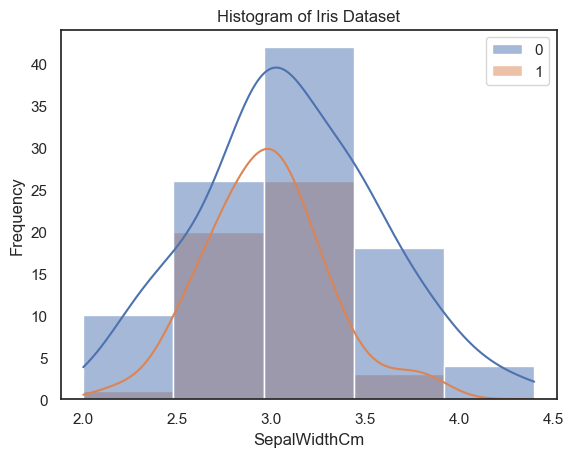

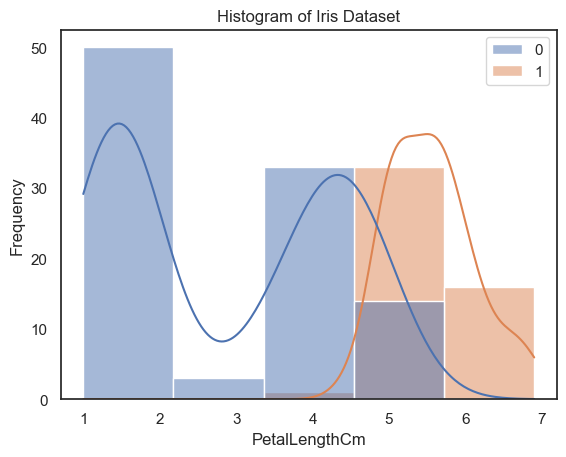

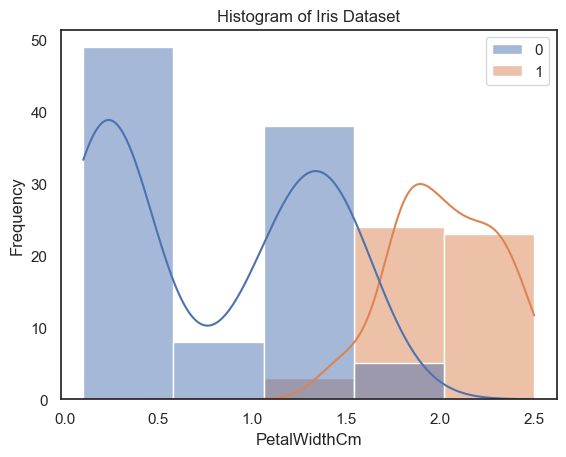

In [93]:
import matplotlib.pyplot as plt

x_his = X.copy()
x_his["y"] = y
x_his["y"].astype(str)
x_his.loc[:class1_index, "y"] = "non-virginica"
x_his.loc[class1_index:, "y"] = "virginica"

for col in x_his.columns:
    if col != "y":
        sns.histplot(data=x_his, x=col, bins=5, hue=y, kde=True, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title("Histogram of Iris Dataset")
        plt.show()

### Correlation matrix between the four features

<Axes: >

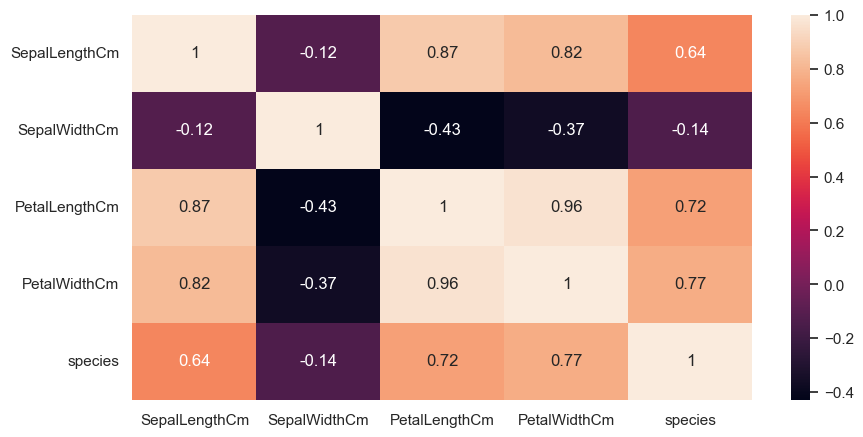

In [94]:
x_heatmap = X.copy()
x_heatmap["species"] = y

pearson = x_heatmap.corr(method="pearson")
plt.figure(figsize=(10, 5))
sns.heatmap(pearson, annot=True)

### Violin plot

<Axes: xlabel='species', ylabel='SepalWidthCm'>

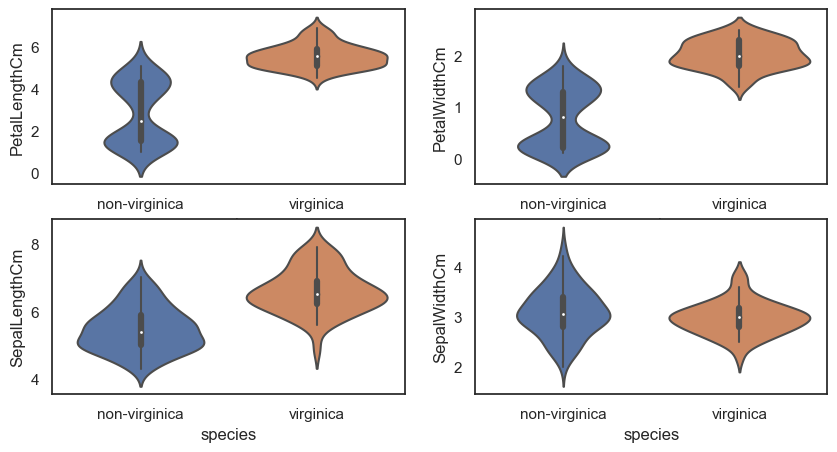

In [95]:
# The code below is referenced from https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris

x_plot_ref = X.copy()
x_plot_ref["species"] = y
x_plot_ref["species"].astype(str)
x_plot_ref.loc[:class1_index, "species"] = "non-virginica"
x_plot_ref.loc[class1_index:, "species"] = "virginica"

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="PetalLengthCm", data=x_plot_ref)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="PetalWidthCm", data=x_plot_ref)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="SepalLengthCm", data=x_plot_ref)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="SepalWidthCm", data=x_plot_ref)

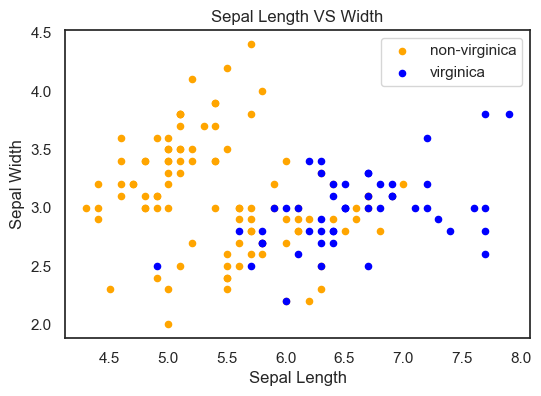

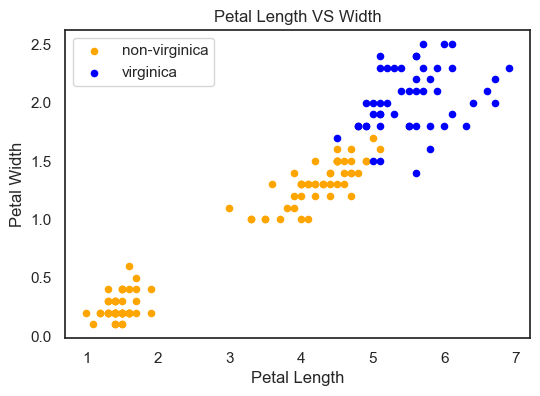

In [113]:
# The code below is referenced from https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris

for i, part in enumerate(["Sepal", "Petal"]):
    # plt.subplot(2, 2, i+1)
    fig = x_plot_ref[x_plot_ref.species == "non-virginica"].plot.scatter(
        x=f"{part}LengthCm", y=f"{part}WidthCm", color="orange", label="non-virginica"
    )
    x_plot_ref[x_plot_ref.species == "virginica"].plot.scatter(
        x=f"{part}LengthCm", y=f"{part}WidthCm", color="blue", label="virginica", ax=fig
    )
    fig.set_xlabel(f"{part} Length")
    fig.set_ylabel(f"{part} Width")
    fig.set_title(f"{part} Length VS Width")
    fig = plt.gcf()
    fig.set_size_inches(6, 4)
    
plt.show()

### Boxplot with points

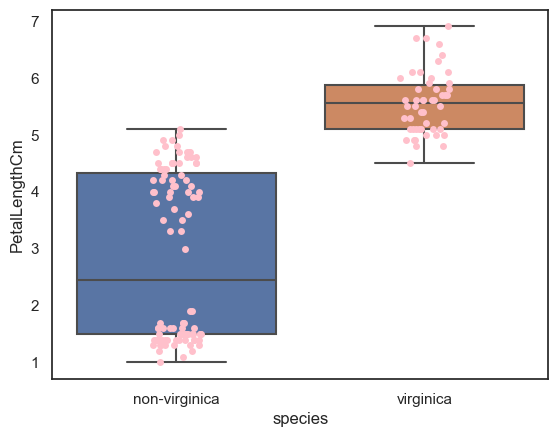

In [97]:
# The code below is referenced from https://www.kaggle.com/code/benhamner/python-data-visualizations

ax = sns.boxplot(x="species", y="PetalLengthCm", data=x_plot_ref)
ax = sns.stripplot(
    x="species",
    y="PetalLengthCm",
    data=x_plot_ref,
    jitter=True,
    edgecolor="gray",
    color="pink",
)

### EDA Summary

> According these process and observations, there is much clear separation between the two classes (**virginica** and **non-virginica**), even in **setosa** and **versicolor**. <br><br>
> The Virginica species has relatively large sizes of petal and sepal. When we examine the scatterplots, histograms, boxplots, and violin plots, there is an obvious gap between them. <br><br>
> However, I also noticed that all these species have no outliers. The non-virginica class has two distinct distribution groups, without surprises. One should be setosa and the other versicolor. Due to the clear distribution, I can much more easily distinguish between them and have a clear insight. <br><br>
> By looking at the violinplots, there is a highly concentrated distribution within petal width and height, must of flowers have the length of petal between 4.5cm and 5.5cm, for width is from 1.8cm to 2.2cm. <br><br>
> In conclusion, the target variable has a high correlation with the width and length of both parts, which can be mutually verified using the heatmap. The species attribute has correlations of 0.64, -0.14, 0.72, and 0.77 with sepal length, sepal width, petal length, and petal width, respectively. Based on the difinition of heatmap, the numbers are much way from 0, it indicate the deep relationship. This fact is consistent with what we observed from the chart above.

### Split the data to a train, validation, and test set

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=36
)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=36
)

X_train.shape, X_test.shape, X_validation.shape, y_train.shape, y_test.shape, y_validation.shape

((120, 4), (15, 4), (15, 4), (120,), (15,), (15,))

### Run four logistic regression models models, with 1,2,3 and 4 features

In [99]:
from sklearn.linear_model import LogisticRegression

log_reg_1_f = LogisticRegression(random_state=36)
log_reg_2_f = LogisticRegression(random_state=36)
log_reg_3_f = LogisticRegression(random_state=36)
log_reg_4_f = LogisticRegression(random_state=36)

model_list = [log_reg_1_f, log_reg_2_f, log_reg_3_f, log_reg_4_f]

In [100]:
for i, model in enumerate(model_list):
    train_data = X_train[X_train.columns[: i + 1]]
    model.fit(train_data, y_train)
    # print(X_train[X_train.columns[:i+1]])

### Evaluate the models on the validation set:

Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validation set. There should be one table per model. Each table should have four columns: instance number, probability of predicting verginica, actual prediction by the model, ground truth.

In [101]:
predict_process_attributes = [
    "instance_number",
    "probability_of_virginica",
    "prediction",
    "ground_truth",
]

df_predict_process_1 = pd.DataFrame(columns=predict_process_attributes)
df_predict_process_2 = pd.DataFrame(columns=predict_process_attributes)
df_predict_process_3 = pd.DataFrame(columns=predict_process_attributes)
df_predict_process_4 = pd.DataFrame(columns=predict_process_attributes)

df_predict_list = [
    df_predict_process_1,
    df_predict_process_2,
    df_predict_process_3,
    df_predict_process_4,
]

for i, model in enumerate(model_list):
    location = 0
    for j, row in X_validation.iterrows():
        validation_val = row.values[:i+1].reshape(1, -1)
        
        df = pd.DataFrame(validation_val, columns=X.columns[:i+1])
        prediction = model.predict(df)
        probability_of_virginica = model.predict_proba(df)

        df_predict_list[i].loc[len(df_predict_list[i])] = [
            j,
            probability_of_virginica[0],
            prediction[0],
            y_validation[location],
        ]

        location += 1
        
df_predict_process_1.head(5)
df_predict_process_2.head(5)
df_predict_process_3.head(5)
df_predict_process_4.head(5)

,instance_number,probability_of_virginica,prediction,ground_truth
0,14,"[0.9999981314673233, 1.8685326767423686e-06]",0,0
1,131,"[0.016616660957175622, 0.9833833390428244]",1,1
2,42,"[0.9999951541625379, 4.845837462113745e-06]",0,0
3,146,"[0.27422719650145344, 0.7257728034985466]",1,1
4,102,"[0.03134614576715511, 0.9686538542328449]",1,1


In [102]:
df_predict_process_1.head(5)

,instance_number,probability_of_virginica,prediction,ground_truth
0,14,"[0.7406244235640198, 0.2593755764359802]",0,0
1,131,"[0.02883867429835585, 0.9711613257016442]",1,1
2,42,"[0.9835882699311171, 0.01641173006888283]",0,0
3,146,"[0.49052004392550796, 0.509479956074492]",1,1
4,102,"[0.14463068722429862, 0.8553693127757014]",1,1


In [103]:
df_predict_process_2.head(5)

,instance_number,probability_of_virginica,prediction,ground_truth
0,14,"[0.7986418592387798, 0.2013581407612201]",0,0
1,131,"[0.03859219219241383, 0.9614078078075862]",1,1
2,42,"[0.9843491407341254, 0.0156508592658746]",0,0
3,146,"[0.455053393332046, 0.544946606667954]",1,1
4,102,"[0.1485799375040382, 0.8514200624959618]",1,1


In [104]:

df_predict_process_3.head(5)

,instance_number,probability_of_virginica,prediction,ground_truth
0,14,"[0.9999955632879963, 4.436712003632215e-06]",0,0
1,131,"[0.010412369942058297, 0.9895876300579417]",1,1
2,42,"[0.9999889691479497, 1.1030852050298158e-05]",0,0
3,146,"[0.388701745232817, 0.611298254767183]",1,1
4,102,"[0.03960537994563995, 0.96039462005436]",1,1


In [105]:

df_predict_process_4.head(5)

,instance_number,probability_of_virginica,prediction,ground_truth
0,14,"[0.9999981314673233, 1.8685326767423686e-06]",0,0
1,131,"[0.016616660957175622, 0.9833833390428244]",1,1
2,42,"[0.9999951541625379, 4.845837462113745e-06]",0,0
3,146,"[0.27422719650145344, 0.7257728034985466]",1,1
4,102,"[0.03134614576715511, 0.9686538542328449]",1,1


In [106]:
from sklearn.metrics import classification_report

for i, model in enumerate(model_list):
    y_pred = model.predict(X_validation.iloc[:,:i+1])
    print(f"Model with 1 feature:\n\n  {classification_report(y_validation, y_pred)}")
    print("---------------------------------\n")

Model with 1 feature:

                precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.70      1.00      0.82         7

    accuracy                           0.80        15
   macro avg       0.85      0.81      0.80        15
weighted avg       0.86      0.80      0.79        15

---------------------------------

Model with 1 feature:

                precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.78      1.00      0.88         7

    accuracy                           0.87        15
   macro avg       0.89      0.88      0.87        15
weighted avg       0.90      0.87      0.87        15

---------------------------------

Model with 1 feature:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                         

Next, summarize the data in each table to a single measure (number) per model. What would you use?

In [107]:
for i, df_predict in enumerate(df_predict_list):
    predict_corrcet_amount = len(
        df_predict_list[i][
            df_predict_list[i]["prediction"] == df_predict_list[i]["ground_truth"]
        ]
    )

    accuracy = round(predict_corrcet_amount/len(df_predict_list[i]), 5)
    print(
        f"Using {i+1} attribute(s) model has accuracy of {accuracy * 100}%"
    )
    # df_predict_list[i]['accuracy'] = accuracy

Using 1 attribute(s) model has accuracy of 80.0%
Using 2 attribute(s) model has accuracy of 86.667%
Using 3 attribute(s) model has accuracy of 100.0%
Using 4 attribute(s) model has accuracy of 100.0%


> I choose *Accuracy* for single measure, the reason is foir most of situations, this is the most straightforward way, apart from that, there are other metrics such as accuracy, recall, and F1 score that can be utilized. <br> <br>
> By observing the results of accuracy, we can see that when the more attribute types provide, we can gain more accuracy, from 0.8 increase to 1.0. This also validates what was mentioned earlier. These four attributes are closely related to distinguishing between different types of iris. It also demonstrates that different types of iris have significant distinctions in appearance. Just by looking at the length of certain body parts, it's possible to discern which type it belongs to.

### Plot the decision boundary for three models (with 1, 2 and 3 features; 3 plots), together with the validation data.

In [108]:
a1 = X_validation.iloc[:, 0]
a2 = X_validation.iloc[:, 1]
a3 = X_validation.iloc[:, 2]


x1 = np.linspace(a1.min(), a1.max(), num=10)
x2 = np.linspace(a2.min(), a2.max(), num=10)
x3 = np.linspace(a3.min(), a3.max(), num=10)

### Plot with 1 feature

In [109]:
decision_boundary = -model_list[0].intercept_ / model_list[0].coef_

decision_boundary

array([[6.28255775]])

> For 1 feature, the decision boundary is 6.28255775 which is a point, means any value that is higher or lower this decision boundary would be classified as non-virginica or virginica

### Plot with 2 features

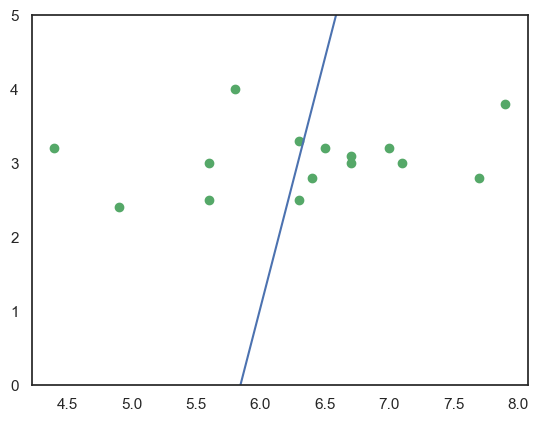

In [110]:
decision_boundary_x1 = x1
decision_boundary_x2 = (
    -model_list[1].intercept_ / model_list[1].coef_[0][1]
    - model_list[1].coef_[0][0] / model_list[1].coef_[0][1] * decision_boundary_x1
)

plt.scatter(a1, a2, c="g", hue="")


plt.plot(decision_boundary_x1, decision_boundary_x2)

ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
# plt.xlim(0, 5)
plt.ylim(0, 5)

plt.show()

### Plot with 3 features

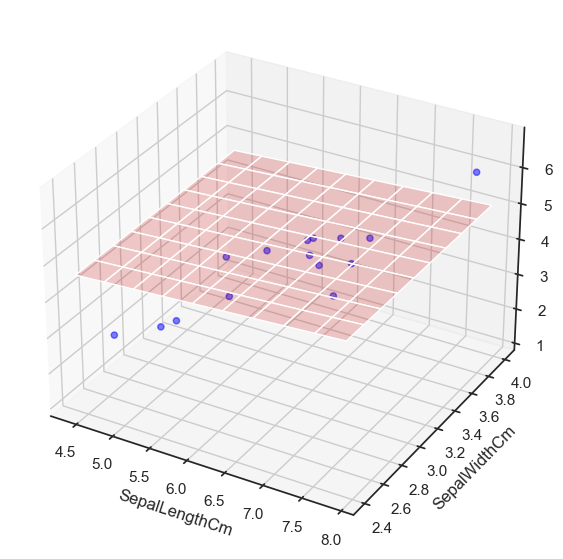

In [111]:
x1, x2 = np.meshgrid(x1, x2)

decision_boundary_x3 = (
    -model_list[2].intercept_[0] / model_list[2].coef_[0][2]
    - model_list[2].coef_[0][0] / model_list[2].coef_[0][2] * x1
    - model_list[2].coef_[0][1] / model_list[2].coef_[0][2] * x2
)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(a1, a2, a3, c="blue", marker="o", alpha=0.5)
ax.plot_surface(x1, x2, decision_boundary_x3, color="red", alpha=0.2)

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')

plt.show()

Print for model 1 (With 1 feature(s)) --------------------------------------------------------


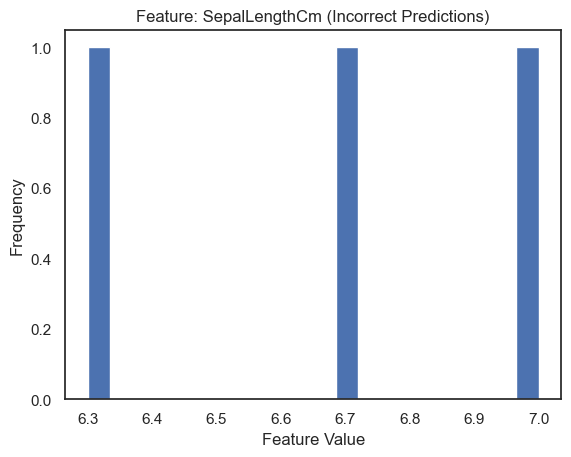

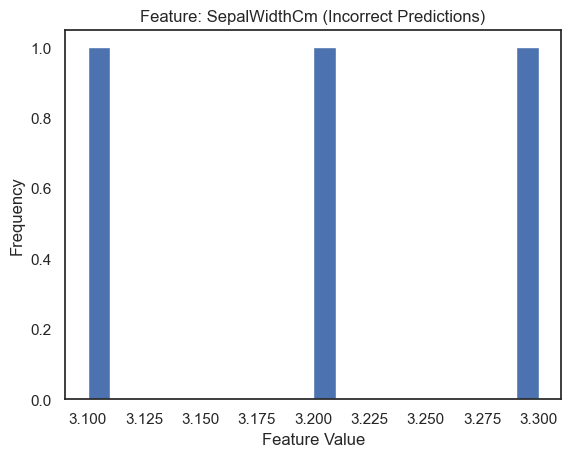

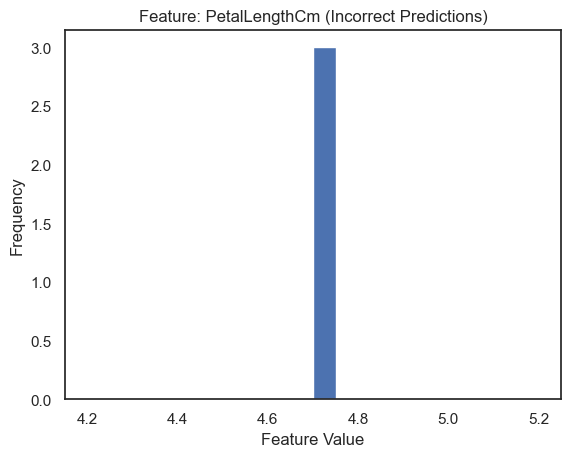

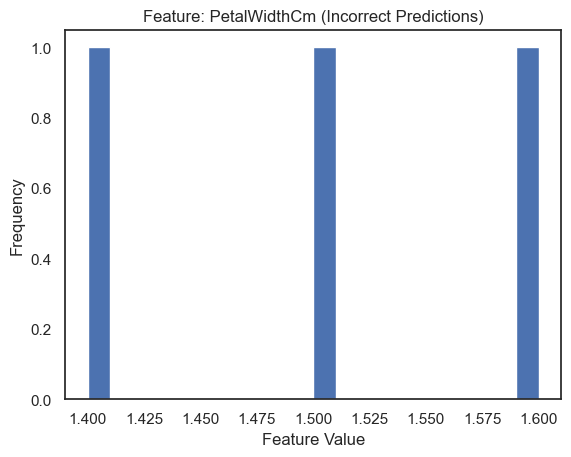

Print for model 2 (With 2 feature(s)) --------------------------------------------------------


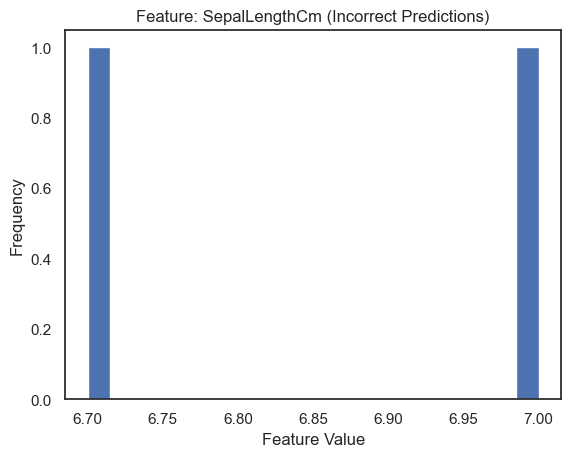

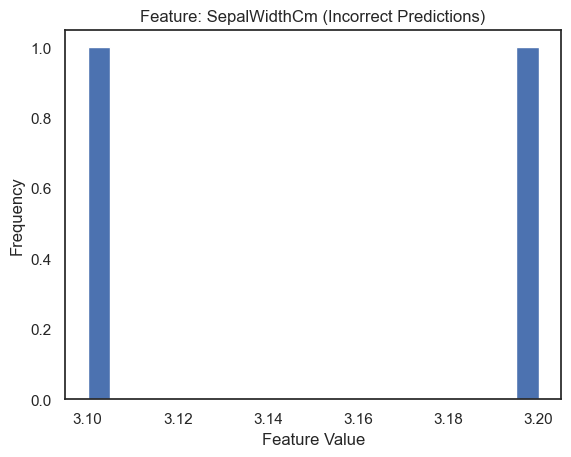

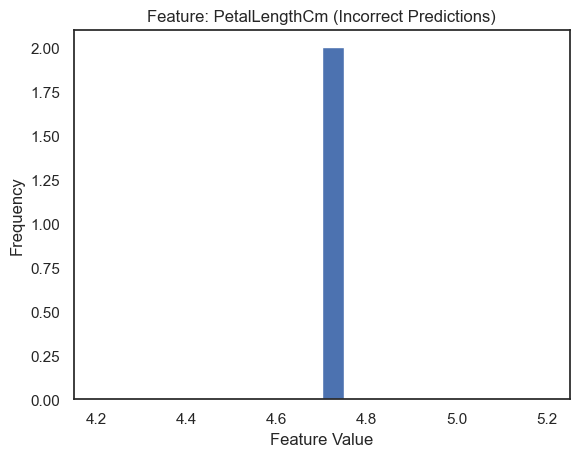

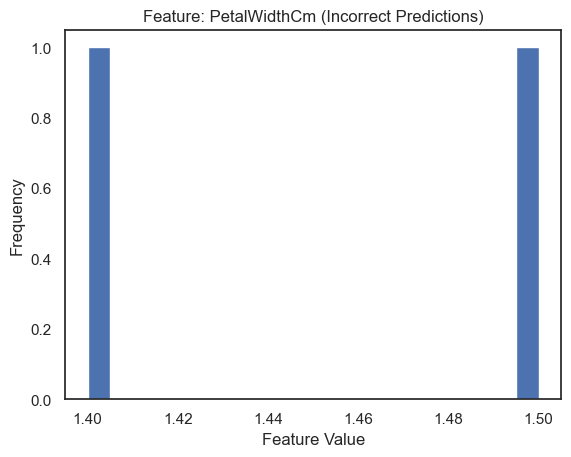

In [112]:
import numpy as np
import matplotlib.pyplot as plt

for i, df_predict in enumerate(df_predict_list):
    
    
    predicted_labels = np.array(df_predict['prediction'])
    actual_labels = np.array(df_predict['ground_truth'])
    incorrect_predictions = np.where(predicted_labels != actual_labels)[0]
    
    if len(incorrect_predictions) > 0:
        
        print(f"Print for model {i+1} (With {i+1} feature(s)) --------------------------------------------------------")
        incorrect_instances = X_validation.iloc[incorrect_predictions]
        incorrect_features = X_validation.columns
        for feature in incorrect_features:
            plt.figure()
            plt.hist(incorrect_instances[feature], bins=20)
            plt.title(f'Feature: {feature} (Incorrect Predictions)')
            plt.xlabel('Feature Value')
            plt.ylabel('Frequency')
            plt.show()


> I used above graphics to show when the inaccurate predictions happened, what is the value for each feature and the frequency of the value. <br> <br>
> For model 1 (With 1 feature), most of the feature values only appear once. However, for Petal lengths between 4.6cm and 4.8cm, they appear three times. Since the validation dataset only consists of 15 rows, it means that every time the model predicts failure, it must be happening within this length range. Therefore, we should pay close attention to this range when considering the use of this model as a solution. <br> <br>
> Furthermore, in model 2 (With 2 features), there is the same issue at Petal length, but fortunately, as more features are provided, the probability of misclassification decreases.

### Recommend the best model (provide reasoning). Summarize the results of this model on the test set.

> The best model is the one with 4 features. Although the models with 3 features and 4 features both have the same accuracy, we can observe that providing more features leads to higher accuracy. For example, the model with 2 features has higher accuracy than the model with 1 feature (86.6667% > 80%), and the model with 3 features has higher accuracy than the model with 2 features (100% > 86.6667%). However, since the validation set only consists of 15 rows, it's possible that the model with 3 features just happened to predict these 15 rows accurately. Once the dataset increases to 1,000 or 2,000 rows, the probability of successful predictions may decrease. <br><br> In conclusion, according to the summary of EDA on the data sources and model predictions results, the model traning with more features would be better than the model with fewer features, and I would choose the model with the highest amount of features (For this case is 4). 